## Example 

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


### 1. Load model

In [2]:
from DecisionTrees import DecisionTreeClassifier

### 2. Create artifical dataset

In [27]:
NN = 100

# generate dataset of 3*NN samples
mu1, mu2, s1, s2 = -1, 1, 0.8,0.8
X = np.concatenate([np.random.normal(mu1, s1, (NN, 2)), np.random.normal(mu2, s2, (NN, 2)), np.random.normal(mu2+2, s2, (NN, 2))])
Y = np.concatenate([np.zeros(NN), np.ones(NN), 0*np.ones(NN)])

# shuffle
idx = np.arange(0, 3*NN, 1)
np.random.shuffle(idx)
X, Y = X[idx], Y[idx]

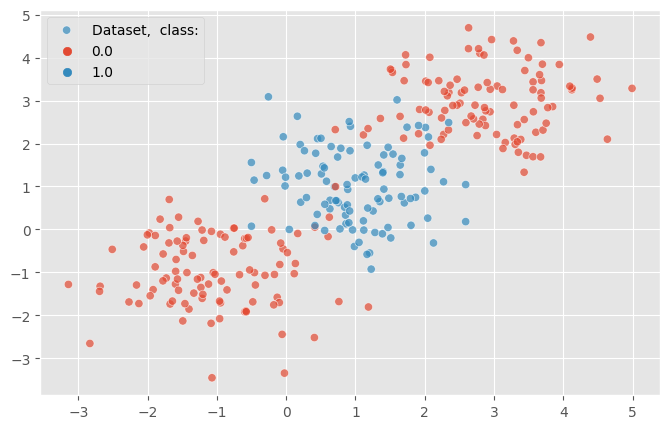

In [28]:
fg, ax = plt.subplots(1,1, figsize=(8, 5), dpi=100)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, alpha = 0.7, label='Dataset,  class:', ax=ax)
ax.legend()

In [29]:
# split for train and test
Xtr, Ytr, Xts, Yts = X[0:3*int(NN*0.8)], Y[0:3*int(NN*0.8)], X[3*int(NN*0.8):,], Y[3*int(NN*0.8):]

print(Xtr.shape, Xts.shape)

(240, 2) (60, 2)


### 3. Create model

In [30]:
dtc = DecisionTreeClassifier(max_depth=None,  # no limit for depth
                             min_sample_split = 1, # no limit for split
                             min_leaf_samples = 1, # no limit for samples count in leaf
                             min_IG_split=1e-10, # no limit for information gain decrease
                             verbose=True # show some stat during fitting
                                )



#### 3.1 Fit

In [31]:
dtc.fit(Xtr, Ytr)

Building tree...
Merging nodes functions...
Done.


#### 3.2 Scores

In [32]:
# train, test scores
dtc.score(Xtr, Ytr), dtc.score(Xts, Yts)
#(the overfitting was caused consciously)

(1.0, 0.9333333333333333)

### 4. Model features overview

#### 4.1 depth, leaves count methods

In [33]:
dtc.get_depth(), dtc.get_leaves_count()

(15, 12)

#### 4.2 Rules overview

The method `get_rules(merge: bool)` returns a callable object, which provides the same interface as `predict` method. This object receives X as an argument and returns a bool array of predictions FOR CLASS 0. Also, it has convenient visualization, if rules should be investigated manually.

In [34]:
callable_obj = dtc.get_rules()
callable_obj

True && x0 < -0.5 || True && x0 < -0.5 || True && !(x0 < -0.5) && x0 >= 2.595 || True && !(x0 < -0.5) && !(x0 >= 2.595) && x1 >= 3.11 || True && !(x0 < -0.5) && !(x0 >= 2.595) && !(x1 >= 3.11) && x1 < -0.922 || True && !(x0 < -0.5) && !(x0 >= 2.595) && !(x1 >= 3.11) && !(x1 < -0.922) && !(x1 >= 1.96) && x0 < 0.732 && x1 < -0.022 || True && !(x0 < -0.5) && !(x0 >= 2.595) && !(x1 >= 3.11) && !(x1 < -0.922) && x1 >= 1.96 && x0 >= 0.709 && x1 < 2.373 && x1 >= 2.2 || True && !(x0 < -0.5) && !(x0 >= 2.595) && !(x1 >= 3.11) && !(x1 < -0.922) && x1 >= 1.96 && x0 >= 0.709 && x1 < 2.373 && !(x1 >= 2.2) && x1 < 2.152 || True && !(x0 < -0.5) && !(x0 >= 2.595) && !(x1 >= 3.11) && !(x1 < -0.922) && x1 >= 1.96 && x0 >= 0.709 && !(x1 < 2.373) && x1 >= 2.583 && x1 < 3.016 || True && !(x0 < -0.5) && !(x0 >= 2.595) && !(x1 >= 3.11) && !(x1 < -0.922) && !(x1 >= 1.96) && x0 < 0.732 && !(x1 < -0.022) && x1 < 1.013 && x0 >= 0.713 || True && !(x0 < -0.5) && !(x0 >= 2.595) && !(x1 >= 3.11) && !(x1 < -0.922) &&

In [35]:
callable_obj(X)

array([False, False, False,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False, False,  True, False, False,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,

In [36]:
dtc.get_rules(merge_to_one = False) # list of rules for each class 0 leaf

[True && x0 < -0.5,
 True && !(x0 < -0.5) && x0 >= 2.595,
 True && !(x0 < -0.5) && !(x0 >= 2.595) && x1 >= 3.11,
 True && !(x0 < -0.5) && !(x0 >= 2.595) && !(x1 >= 3.11) && x1 < -0.922,
 True && !(x0 < -0.5) && !(x0 >= 2.595) && !(x1 >= 3.11) && !(x1 < -0.922) && !(x1 >= 1.96) && x0 < 0.732 && x1 < -0.022,
 True && !(x0 < -0.5) && !(x0 >= 2.595) && !(x1 >= 3.11) && !(x1 < -0.922) && x1 >= 1.96 && x0 >= 0.709 && x1 < 2.373 && x1 >= 2.2,
 True && !(x0 < -0.5) && !(x0 >= 2.595) && !(x1 >= 3.11) && !(x1 < -0.922) && x1 >= 1.96 && x0 >= 0.709 && x1 < 2.373 && !(x1 >= 2.2) && x1 < 2.152,
 True && !(x0 < -0.5) && !(x0 >= 2.595) && !(x1 >= 3.11) && !(x1 < -0.922) && x1 >= 1.96 && x0 >= 0.709 && !(x1 < 2.373) && x1 >= 2.583 && x1 < 3.016,
 True && !(x0 < -0.5) && !(x0 >= 2.595) && !(x1 >= 3.11) && !(x1 < -0.922) && !(x1 >= 1.96) && x0 < 0.732 && !(x1 < -0.022) && x1 < 1.013 && x0 >= 0.713,
 True && !(x0 < -0.5) && !(x0 >= 2.595) && !(x1 >= 3.11) && !(x1 < -0.922) && !(x1 >= 1.96) && x0 < 0.732 

In [37]:
dtc.predict(X)

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0], d

#### 5. Tree visualization

To draw built tree jsut call method `visualize`
Image could be saved with specific name by using args `save=True` & `name=...`

In [38]:
img = dtc.visualize(save=True, name='tree_example')

Drawing tree...
Done.


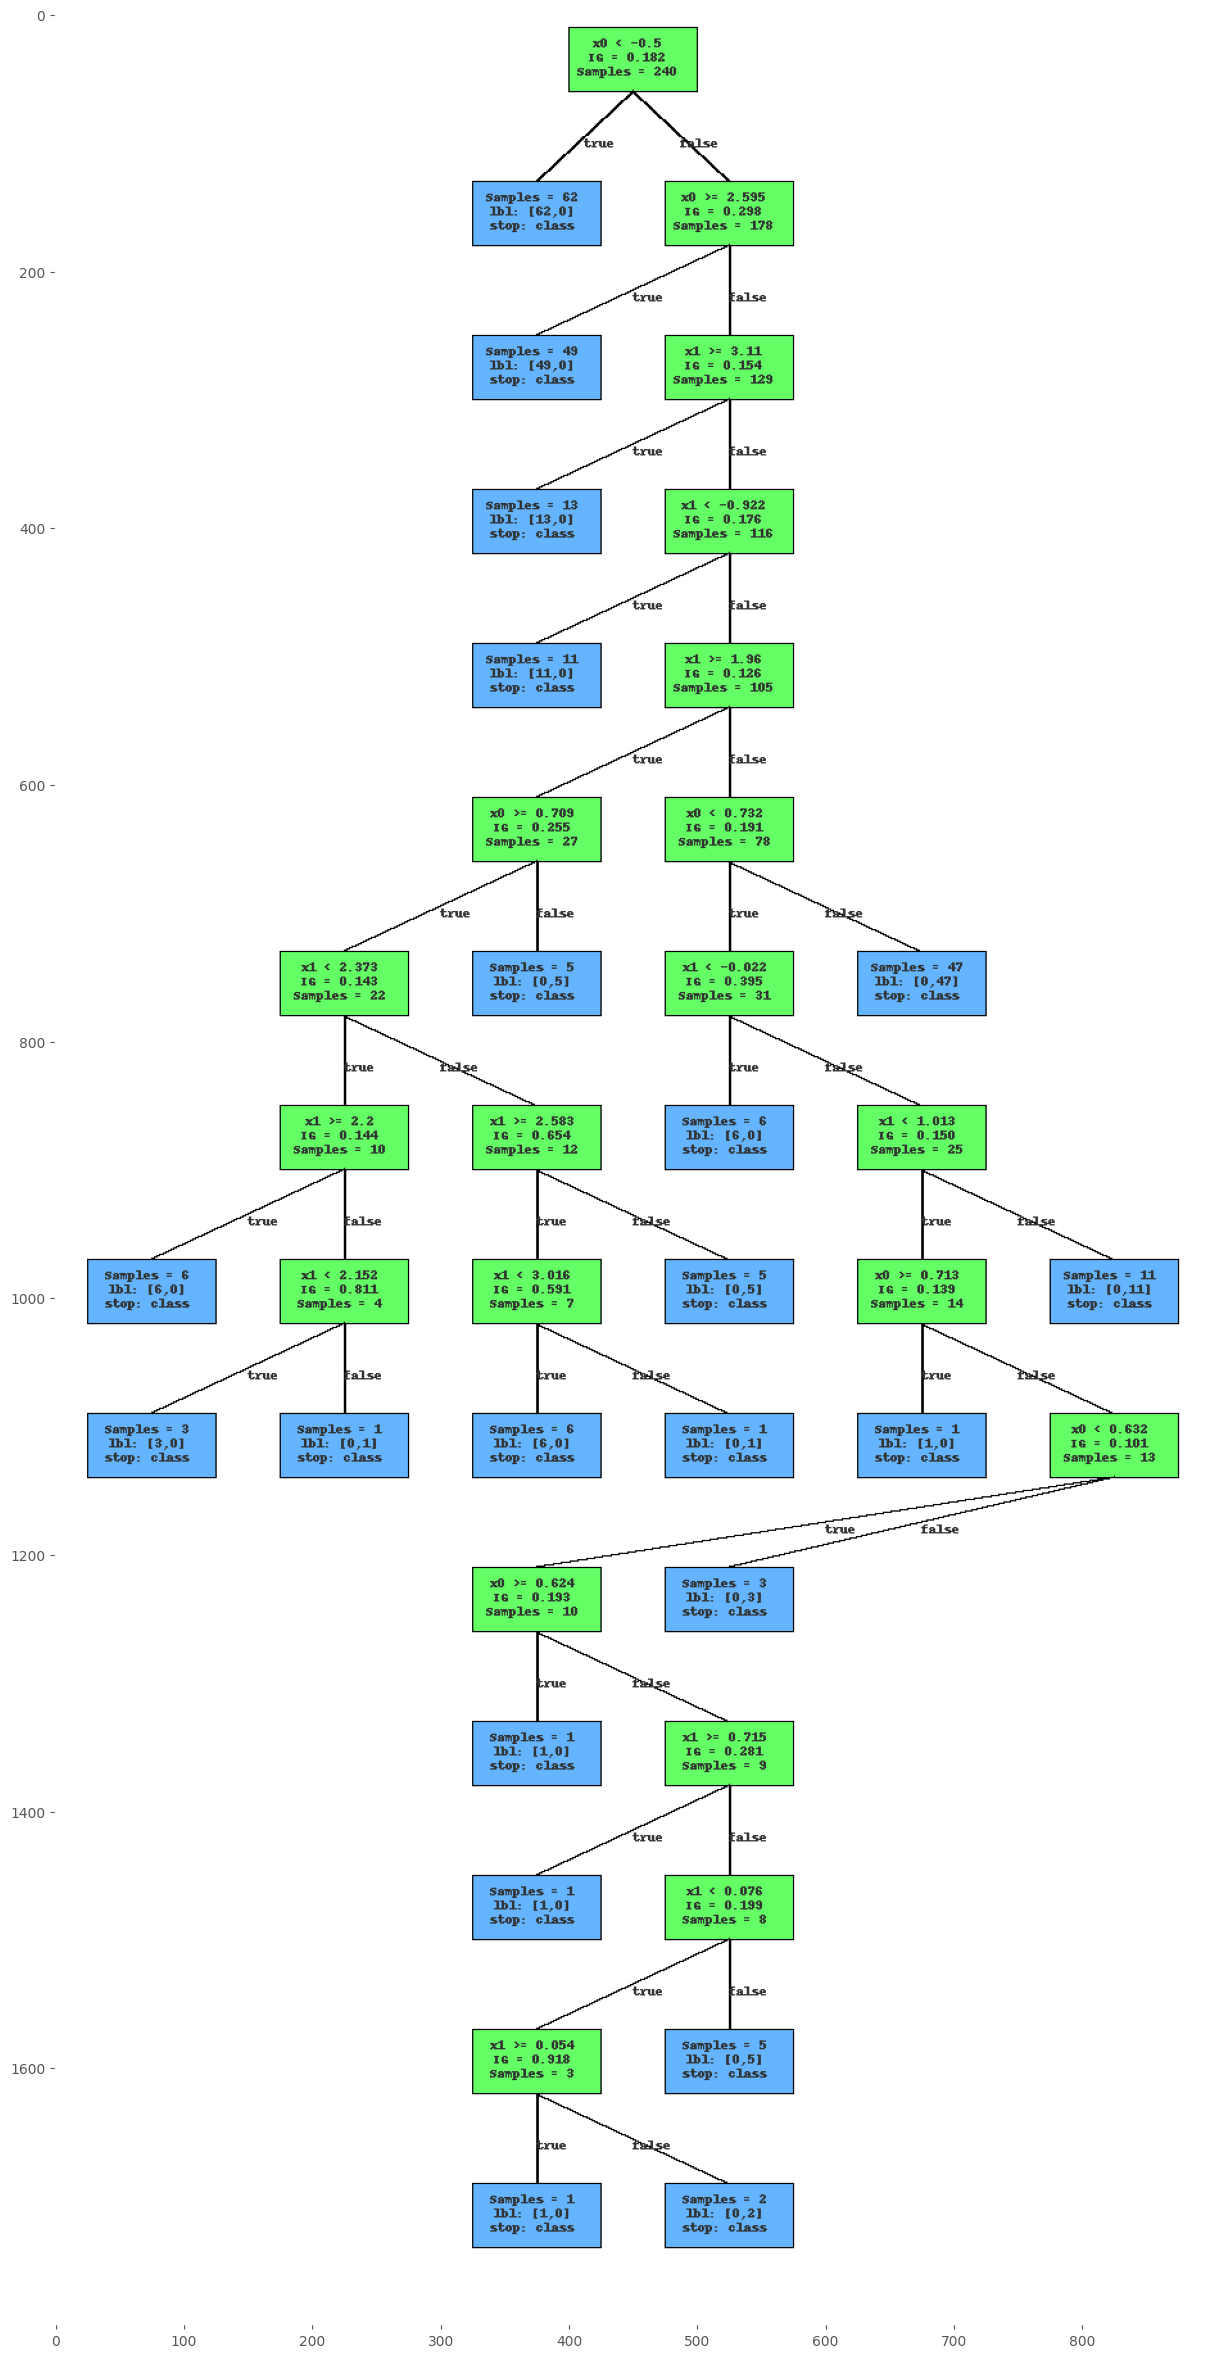

In [40]:
_, ax = plt.subplots(1,1, figsize=(20,30), dpi=100)
ax.imshow(img)
ax.grid(False)